## (2017 Census Income Per Capita analysis)
## by (Christopher James)

## Preliminary Wrangling

This dataset contains population, travel, work, and income information from the 2017 Census Bureau ACS survey. Wrangling was done in the notebook 'census_wrangle.ipynb' A summary of this can be found in the file 'wrangle_report.pdf.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Set option to allow all rows and colums to be displayed in notebook.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

In [3]:
# Any needed functions

# returns mean absolute error for random forests.
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

# Function to generate a random sample of df rows.
def df_sample(dataframe, samp_size):
    samples = np.random.choice(dataframe.shape[0], samp_size, replace = False)
    return dataframe.loc[samples,:]

In [4]:
# Load CSV file into dataframe
df_original = pd.read_csv('acs2017_census_tract_data_master.csv')

In [5]:
# Copy dataframe before analysis begins.
df = df_original.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           74001 non-null  int64  
 1   State             74001 non-null  object 
 2   County            74001 non-null  object 
 3   TotalPop          74001 non-null  int64  
 4   Men               74001 non-null  int64  
 5   Women             74001 non-null  int64  
 6   Hispanic          73305 non-null  float64
 7   White             73305 non-null  float64
 8   Black             73305 non-null  float64
 9   Native            73305 non-null  float64
 10  Asian             73305 non-null  float64
 11  Pacific           73305 non-null  float64
 12  VotingAgeCitizen  74001 non-null  int64  
 13  Income            72885 non-null  float64
 14  IncomeErr         72885 non-null  float64
 15  IncomePerCap      73256 non-null  float64
 16  IncomePerCapErr   73256 non-null  float6

In [7]:
corr = df.corr()['IncomePerCap']
corr

TractId            -0.063549
TotalPop            0.040227
Men                 0.030903
Women               0.047965
Hispanic           -0.304357
White               0.373485
Black              -0.283210
Native             -0.076966
Asian               0.216731
Pacific            -0.024617
VotingAgeCitizen    0.114150
Income              0.836809
IncomeErr           0.601452
IncomePerCap        1.000000
IncomePerCapErr     0.752062
Poverty            -0.594810
ChildPoverty       -0.571800
Professional        0.800398
Service            -0.580823
Office             -0.134562
Construction       -0.408269
Production         -0.542442
Drive              -0.046829
Carpool            -0.347200
Transit             0.077501
Walk               -0.026335
OtherTransp         0.007608
WorkAtHome          0.441172
MeanCommute         0.123553
Employed            0.194114
PrivateWork        -0.014917
PublicWork         -0.071715
SelfEmployed        0.164517
FamilyWork          0.021470
Unemployment  

### What is the structure of your dataset?

This dataset consists of 74,001 rows along with 37 columns. Those columns are 'TractId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen', 'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', and 'Unemployment'.

### What is/are the main feature(s) of interest in your dataset?

I am interested in the attributes that contribute to income per capita.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Based on the coorelation chart above, the following attributes are strong enough to further examine: Poverty, ChildPoverty, Professional, Service, Construction, Production, WorkAtHome, and Unemployment. Other income features will not be analyzed.

## Univariate Exploration

First, I will examine the distributions of each of the features that I intend to analyse.

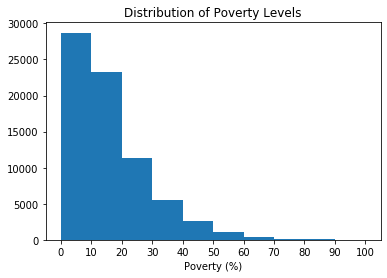

In [8]:
# Plot distribution of poverty.
bins = np.arange(0, 100 + 1, 10)
ticks = bins
labels = ["{}".format(val) for val in ticks]

plt.hist(data = df, x = 'Poverty', bins = bins)
plt.xticks(ticks, labels)
plt.title('Distribution of Poverty Levels')
plt.xlabel('Poverty (%)');

Poverty levels are rightly skewed quite a bit. They start off between 0 and 10 percent, and rapidy decline from there, espicially after 20%. Few Census tracts have poverty levels abouve 70%. Now, on to child poverty. 

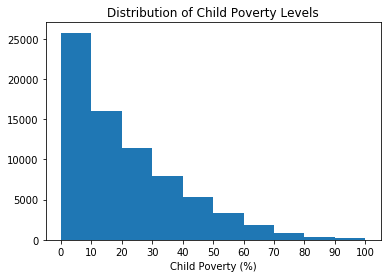

In [9]:
# Plot distribution of child poverty.
bins = np.arange(0, 100 + 1, 10)
ticks = bins
labels = ["{}".format(val) for val in ticks]

plt.hist(data = df, x = 'ChildPoverty', bins = bins)
plt.xticks(ticks, labels)
plt.title('Distribution of Child Poverty Levels')
plt.xlabel('Child Poverty (%)');

Much like poverty levels, the child poverty levels are rightly skewed, but in a somewhat less dramatic way. The fall after 20% onward is less pronounced. In addition, there are more places that have child poverty levels abouve 70%. Next, I will look at professional job levels.

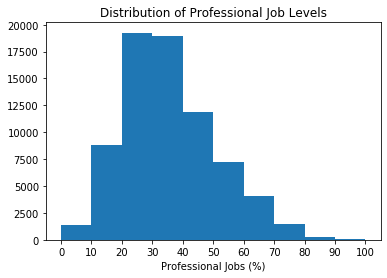

In [10]:
# Plot distribution of professional jobs.
bins = np.arange(0, 100 + 1, 10)
ticks = bins
labels = ["{}".format(val) for val in ticks]

plt.hist(data = df, x = 'Professional', bins = bins)
plt.xticks(ticks, labels)
plt.title('Distribution of Professional Job Levels')
plt.xlabel('Professional Jobs (%)');

The distribution of professional jobs is rightly skewed, peaking at between 20 and 30 percent, before falling slightly at 30%, then falling rapidly until it gets to 80%. Few tracts have a level higher than that. Now, I will examine service jobs.

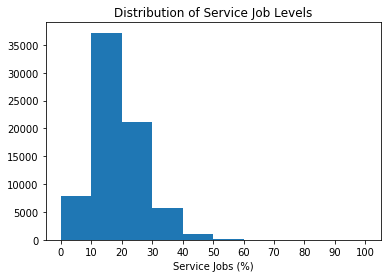

In [11]:
# Plot distribution of service jobs.
bins = np.arange(0, 100 + 1, 10)
ticks = bins
labels = ["{}".format(val) for val in ticks]

plt.hist(data = df, x = 'Service', bins = bins)
plt.xticks(ticks, labels)
plt.title('Distribution of Service Job Levels')
plt.xlabel('Service Jobs (%)');

Here, We see that service jobs peak early on, between 10 and 20 percent, before collapsing rapidly through between 40 and 50%. After that, the numbers are extremely low. Next, I will move on to construction jobs.

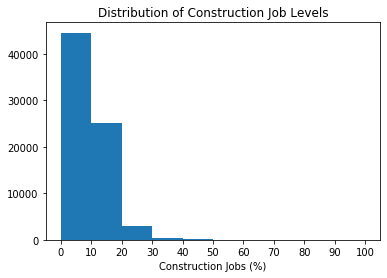

In [12]:
# Plot distribution of construction jobs.
bins = np.arange(0, 100 + 1, 10)
ticks = bins
labels = ["{}".format(val) for val in ticks]

plt.hist(data = df, x = 'Construction', bins = bins)
plt.xticks(ticks, labels)
plt.title('Distribution of Construction Job Levels')
plt.xlabel('Construction Jobs (%)');

The distribution of tracts based on percentage of jobs in construction is extremely skewed to the right, peaking right off the bat between 0 and 10%. It then falls rapidly to between 30 and 40%, with very little after that. Now, I will look at production jobs. 

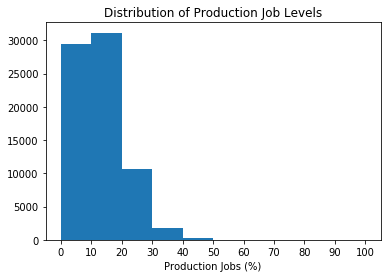

In [18]:
# Plot distribution of production job.
bins = np.arange(0, 100 + 1, 10)
ticks = bins
labels = ["{}".format(val) for val in ticks]

plt.hist(data = df, x = 'Production', bins = bins)
plt.xticks(ticks, labels)
plt.title('Distribution of Production Job Levels')
plt.xlabel('Production Jobs (%)');

This distribution is extremely skewed to the right, with the majority, along with the peak, occuring before it hits 20 percent. then it declines until it hits 50%, with virtually nothing after that. Next, I will examine work at home jobs.

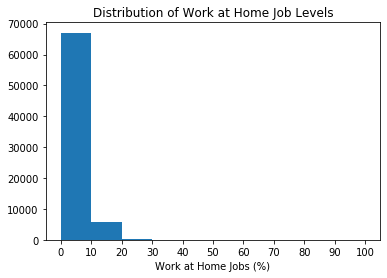

In [19]:
# Plot distribution of work at home job percentage.
bins = np.arange(0, 100 + 1, 10)
ticks = bins
labels = ["{}".format(val) for val in ticks]

plt.hist(data = df, x = 'WorkAtHome', bins = bins)
plt.xticks(ticks, labels)
plt.title('Distribution of Work at Home Job Levels')
plt.xlabel('Work at Home Jobs (%)');

This chart is about as rightly skewed as they come. It clearly peaks between 0 and 10%, before cliff diving until it hits 30%, with nothing after that. Finally I will look at the disribution of unemployment numbers.

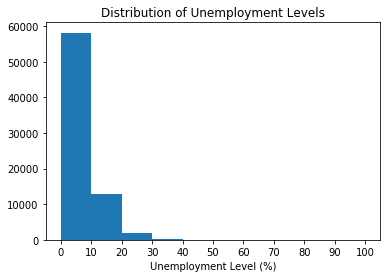

In [28]:
# Plot distribution of unemployment levels.
bins = np.arange(0, 100 + 1, 10)
ticks = bins
labels = ["{}".format(val) for val in ticks]

plt.hist(data = df, x = 'Unemployment', bins = bins)
plt.xticks(ticks, labels)
plt.title('Distribution of Unemployment Levels')
plt.xlabel('Unemployment Level (%)');

In yet another incredibly skewed chart, the vast majority of tracts have unemployment levels between 0 and 10%, before an enormous drop that culminates with a flat line after 40%.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The only surprising distribution I could find was the less extreme decline in the child poverty chart when compared with poverty in general. This indicates that there are more cases of extreme child poverty than there are cases of poverty overall.

## Bivariate Exploration

First, I will examine per capita income by poverty level.

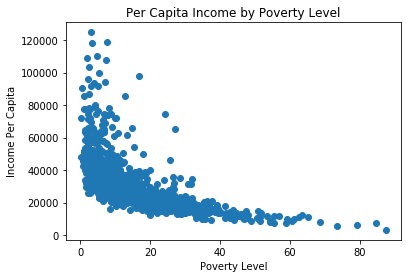

In [29]:
# Plot per capita income by poverty level. 
pov_samp = df_sample(df, 1000)
plt.scatter(data = pov_samp, x = 'Poverty', y = 'IncomePerCap')
plt.xlabel('Poverty Level')
plt.ylabel('Income Per Capita')
plt.title('Per Capita Income by Poverty Level');

Even a somewhat small amount of poverty can have large negative consequences. As this chart shows, per capita income falls much more when poverty increases from a lower amount than it does from a higher amount. Next, I will analyze per capita income broken down by child poverty.

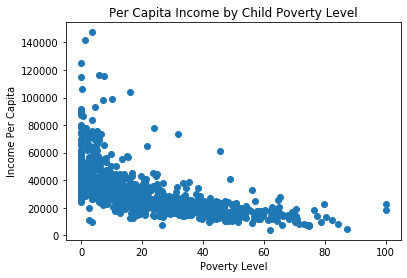

In [32]:
# Plot per capita income by child poverty level. 
cpov_samp = df_sample(df, 1000)
plt.scatter(data = cpov_samp, x = 'ChildPoverty', y = 'IncomePerCap')
plt.xlabel('Poverty Level')
plt.ylabel('Income Per Capita')
plt.title('Per Capita Income by Child Poverty Level');

The effect that child poverty has on per capita income is smaller than overall poverty, with a more even and gradual decline as child poverty increases. Next, I will look at per capita income crossed with the level of professional jobs.

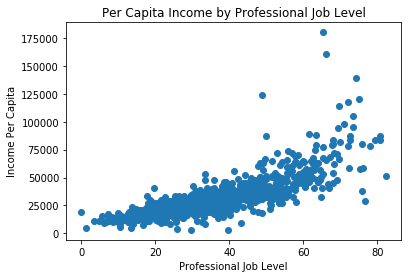

In [40]:
# Plot per capita income by professional job level. 
pjob_samp = df_sample(df, 1000)
plt.scatter(data = pjob_samp, x = 'Professional', y = 'IncomePerCap')
plt.xlabel('Professional Job Level')
plt.ylabel('Income Per Capita')
plt.title('Per Capita Income by Professional Job Level');

There is a pretty strong coorelation between increased per capita income and increased percentage of professional jobs. Interestingly enough, that coorelation appears to get somewhat weaker towards the higher end of the professional jobs scale.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!